# Selecionando Pontos Dentro de uma Região

In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [3]:
rj.crs

<Projected CRS: PROJCS["UTM_Zone_23_Southern_Hemisphere",GEOGCS["G ...>
Name: UTM_Zone_23_Southern_Hemisphere
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [4]:
geo_dados.crs

<Projected CRS: PROJCS["UTM_Zone_23_Southern_Hemisphere",GEOGCS["G ...>
Name: UTM_Zone_23_Southern_Hemisphere
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

<AxesSubplot:>

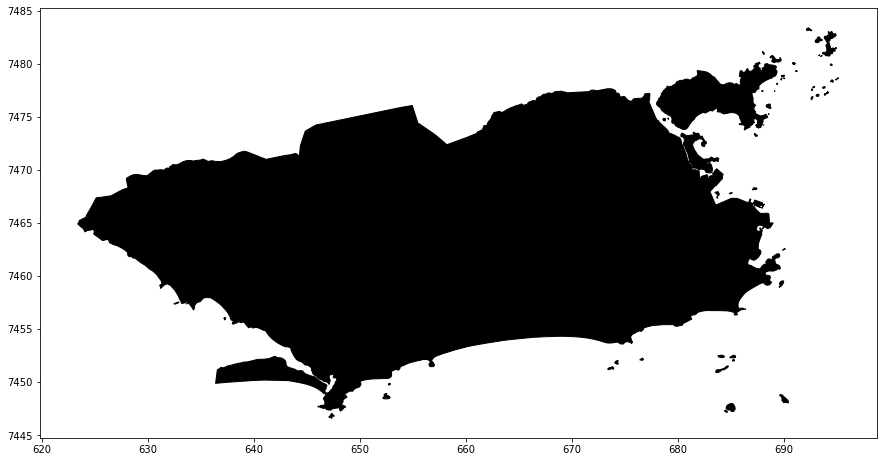

In [5]:
rj.plot(color='black', edgecolor='black', figsize=(15, 8))

<AxesSubplot:>

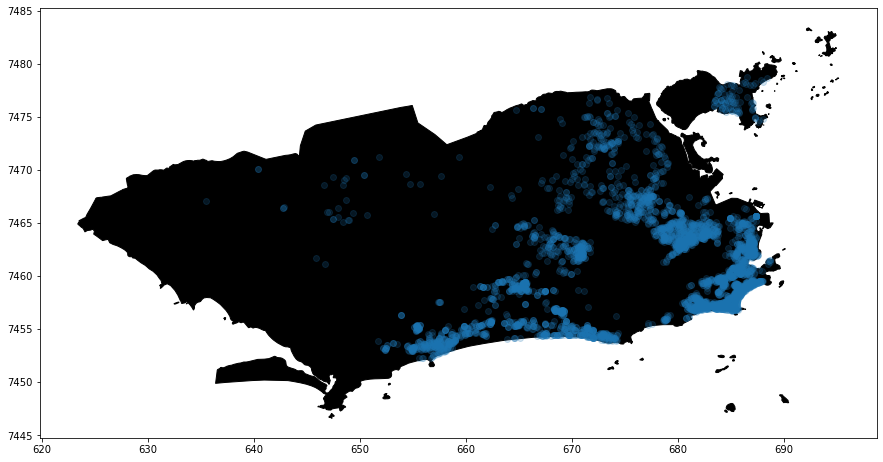

In [6]:
base = rj.plot(color='black', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)

In [7]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [8]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 0, dtype: object

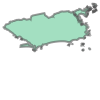

In [9]:
rj.iloc[0].geometry

In [10]:
geo_dados.iloc[0]

Area                                                  138
Bairro                           Recreio dos Bandeirantes
Cidade                                     Rio de Janeiro
Endereco                              Rua Vicente Scofano
Estado                                                 RJ
Latitude                                         -23.0165
Longitude                                        -43.4629
Quartos                                                 3
Suites                                                  1
Vagas                                                   3
Tipo                                          Apartamento
Transacao                                           Venda
Valor                                             1095000
Dist_Metro                                        15.6229
geometry      POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

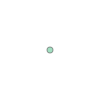

In [11]:
geo_dados.iloc[0].geometry

In [12]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [13]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [14]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0       True
1       True
2       True
3       True
4       True
        ... 
4508    True
4509    True
4510    True
4511    True
4512    True
Length: 4513, dtype: bool

In [15]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,POINT (678.393 7464.417)


In [16]:
amostra = geo_dados.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574)
5,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,0.789122,POINT (679.746 7462.762)
6,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,0.544597,POINT (685.278 7457.298)
7,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,0.386448,POINT (687.096 7462.359)
8,67,Grajaú,Rio de Janeiro,Rua José do Patrocínio,RJ,-22.918533,-43.262945,2,0,1,Apartamento,Venda,450000,2.784923,POINT (678.142 7464.447)
9,138,Barra da Tijuca,Rio de Janeiro,Avenida General Guedes da Fontoura,RJ,-23.013213,-43.303056,3,3,3,Apartamento,Venda,1900000,1.072945,POINT (673.906 7454.011)


<AxesSubplot:>

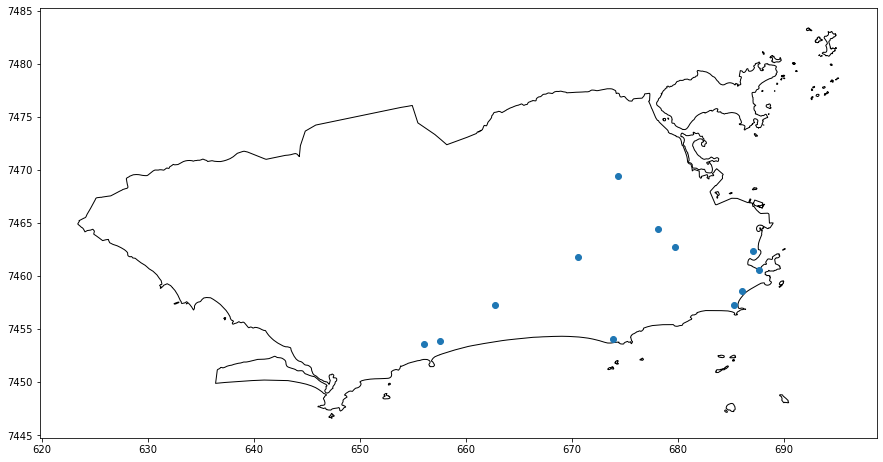

In [17]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
amostra.plot(ax=base, figsize=(15, 8), alpha=1)

In [18]:
antes = geo_dados.shape[0]

In [19]:
antes

4513

In [20]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [21]:
depois = geo_dados.shape[0]

In [22]:
antes - depois

0

<AxesSubplot:>

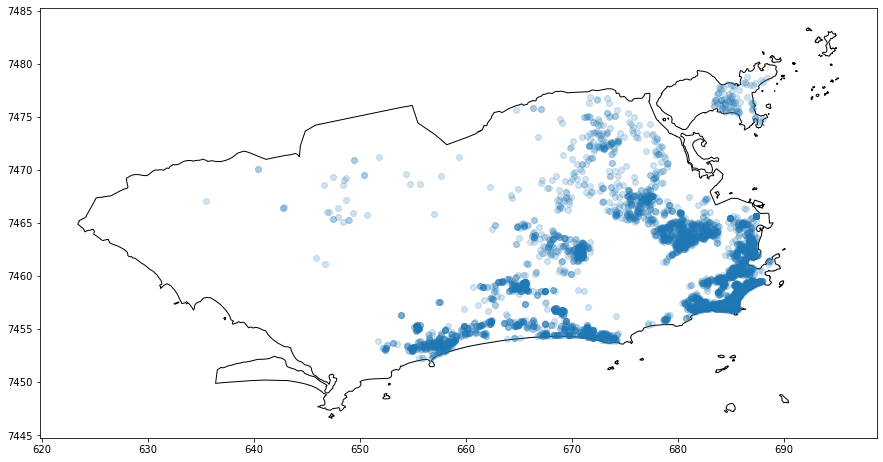

In [23]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)

In [24]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')